# Loan Prediciton Model By Machine Learning


***Hey viewer , This is my first hackathon where I participated . This is a Bignner notebook , So excuse me if something missed.***

***So Let's go .....***

In [1]:
#Importing required modulues..
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading trian ,test Csv's 

train = pd.read_csv('train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Gathering information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#Describing the train csv

train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#Reading Test csv

test = pd.read_csv('test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


**Creating Copy of these two dataset . (for backcup if we loose or need of Original set)**

In [8]:
train_Original = train.copy()
test_Original = test.copy()

**So Now Getting columns info**

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Shape of train Data

In [11]:
train.shape #OOH, We have 614 rowes and 13 columns

(614, 13)

Shape of test Data

In [12]:
test.shape  #Okay.. 367 rows and 12 columns

(367, 12)

Nomarlize Loan Status

In [13]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

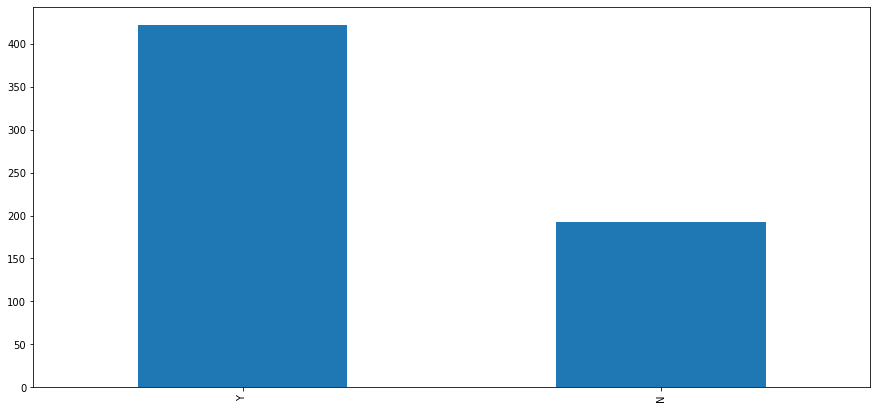

In [14]:
train['Loan_Status'].value_counts().plot.bar(figsize=(15,7))

The loan of 422(around 69%) people out of 614 were approved.

**Visualizing Data**

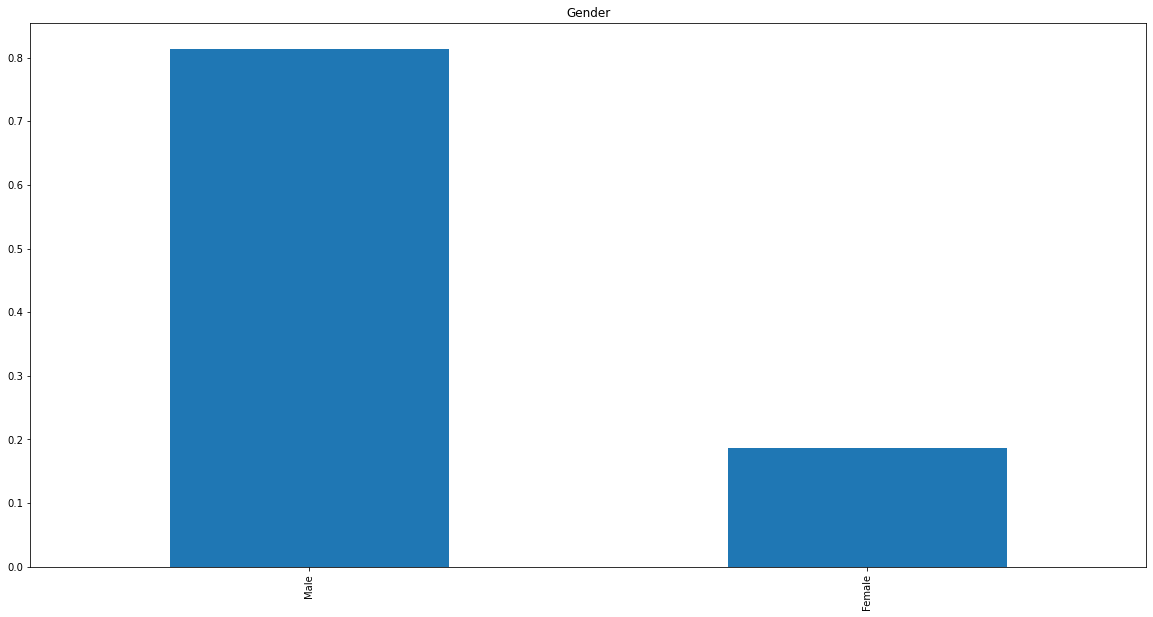

In [15]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.show()

**Gender ratio is 4 times of female . So most of the applicants are man**

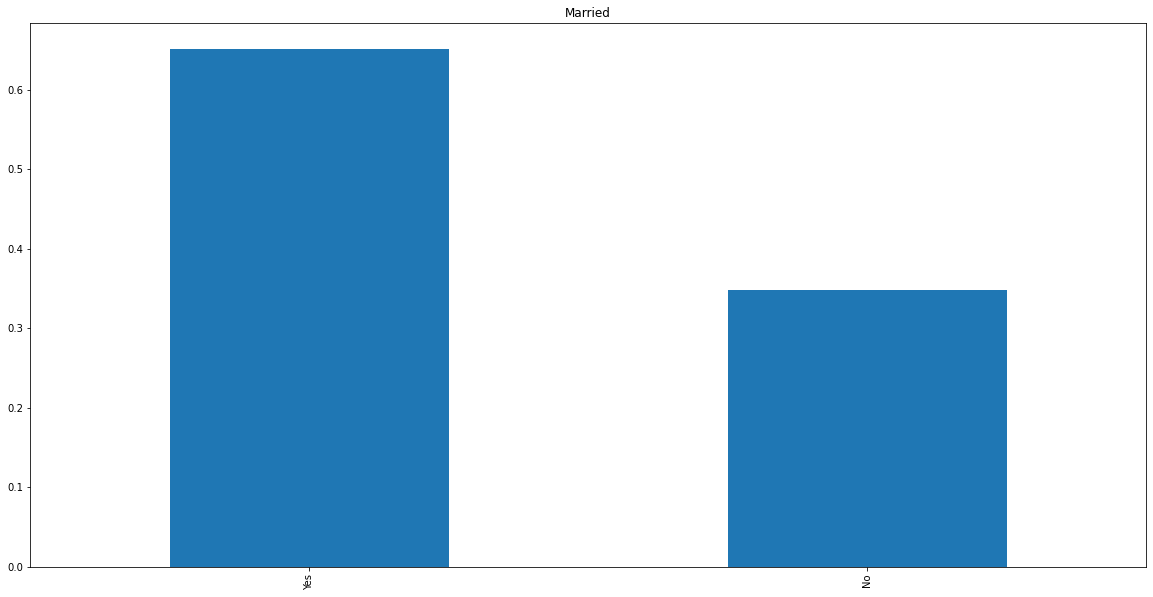

In [16]:
plt.figure(figsize=(20,10))
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

**From this we can see that half of the loan status is NO as compare to Yes**

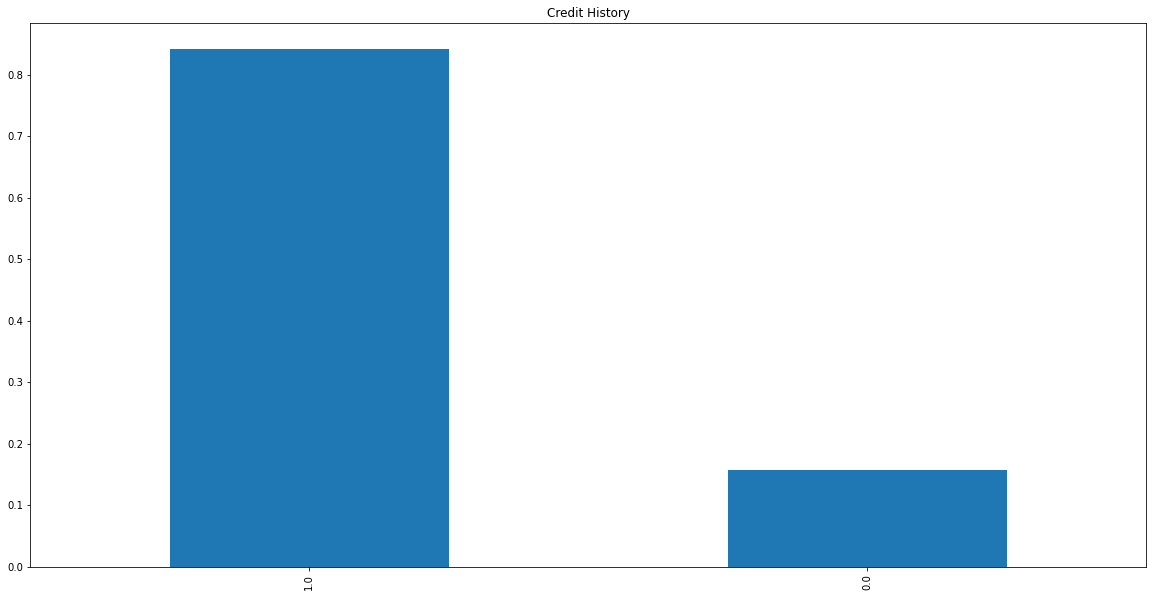

In [17]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit History')
plt.show()

**80% of the applicants had good Credit history

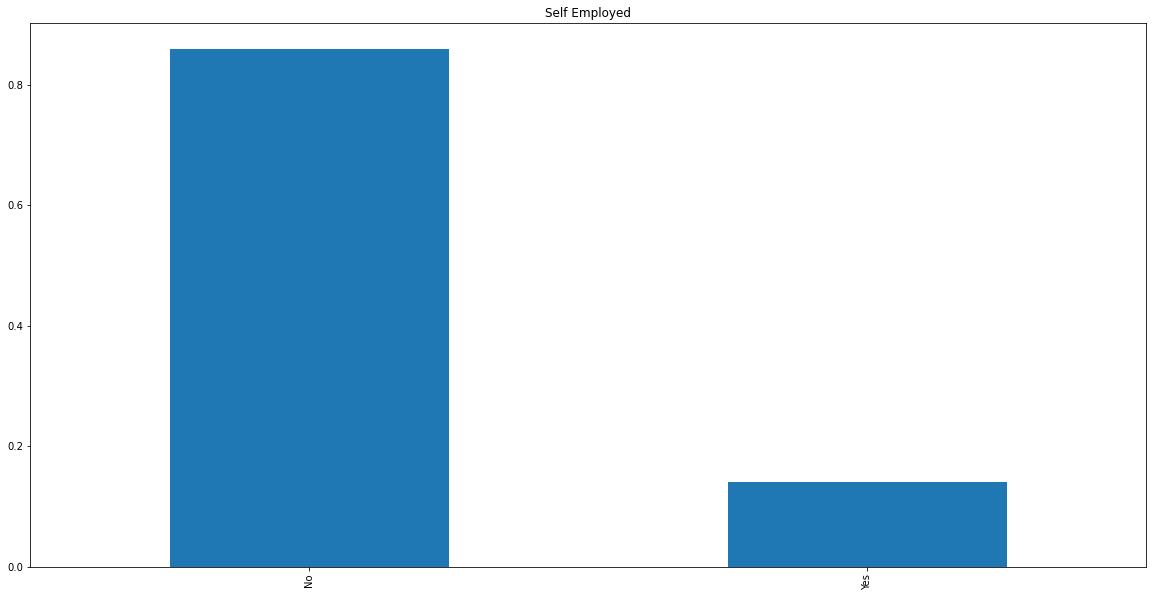

In [18]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self Employed')
plt.show()

**Many applicants are not Self employed**

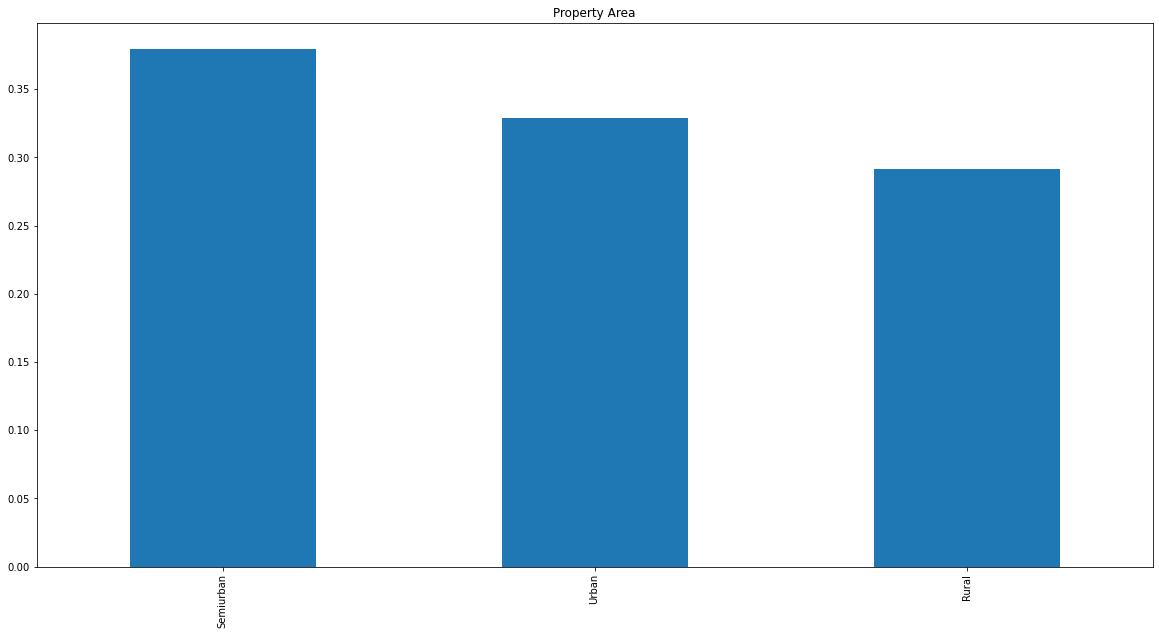

In [19]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Property Area')
plt.show()

**Most of the aapplicants are  from Semiurban**

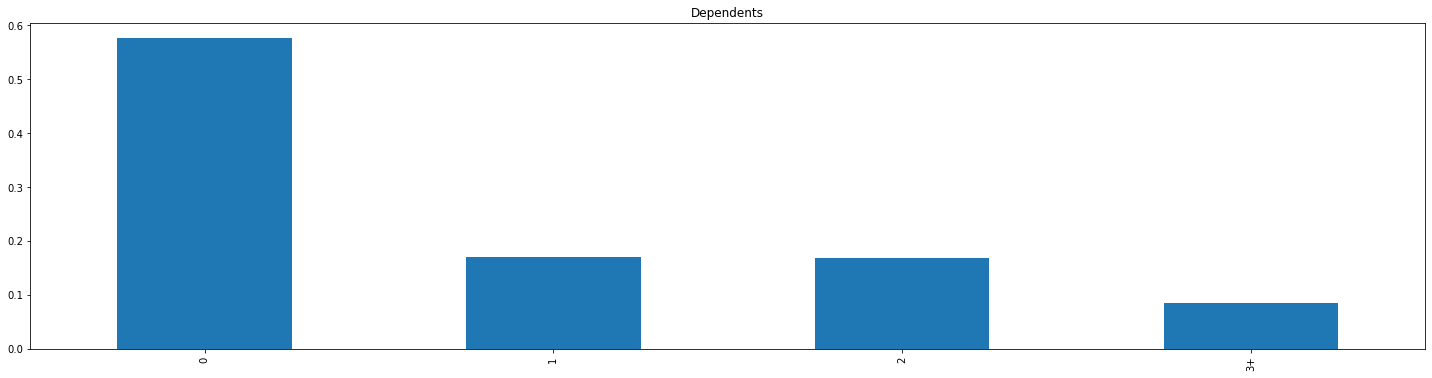

In [20]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(25,6),title='Dependents')
plt.show()

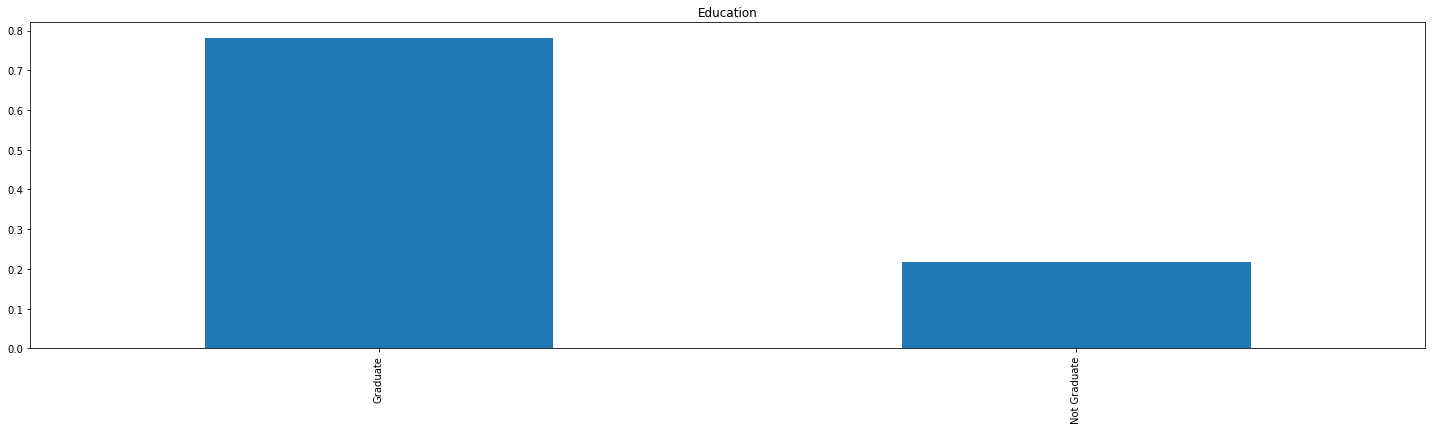

In [21]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(25,6),title='Education')
plt.show()

Many are Graduate and 80% of applicants are Not graduate

<AxesSubplot:xlabel='ApplicantIncome'>

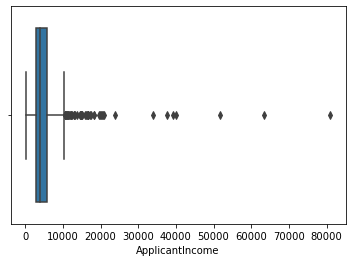

In [22]:
#Using seaborn for visualize Applicant Income

sns.boxplot(x='ApplicantIncome',data=train)

C:\Users\ANIGUN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

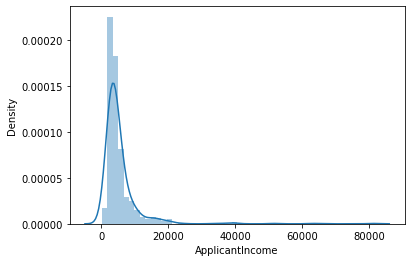

In [23]:
sns.distplot(train['ApplicantIncome'])

Text(0.5, 0.98, '')

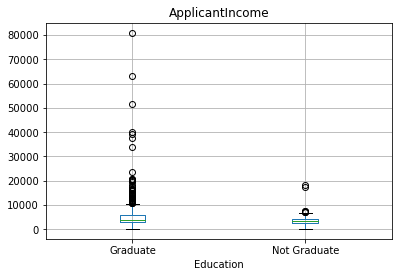

In [24]:
#Creating Boxplot according to applicant income and educaation

train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

C:\Users\ANIGUN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 7200x3600 with 0 Axes>

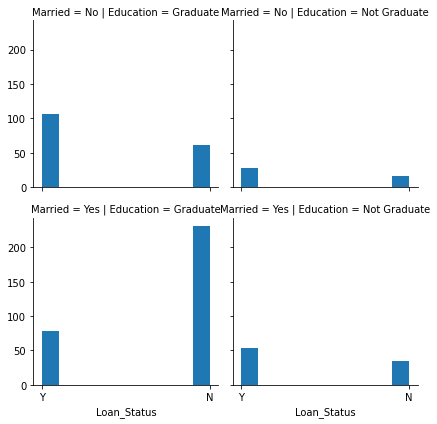

In [25]:
plt.figure(figsize=(100,50))
g=sns.FacetGrid(train,'Married','Education')
g=g.map(plt.hist,'Loan_Status')

<AxesSubplot:xlabel='Loan_Status'>

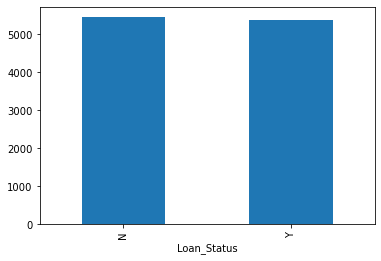

In [26]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

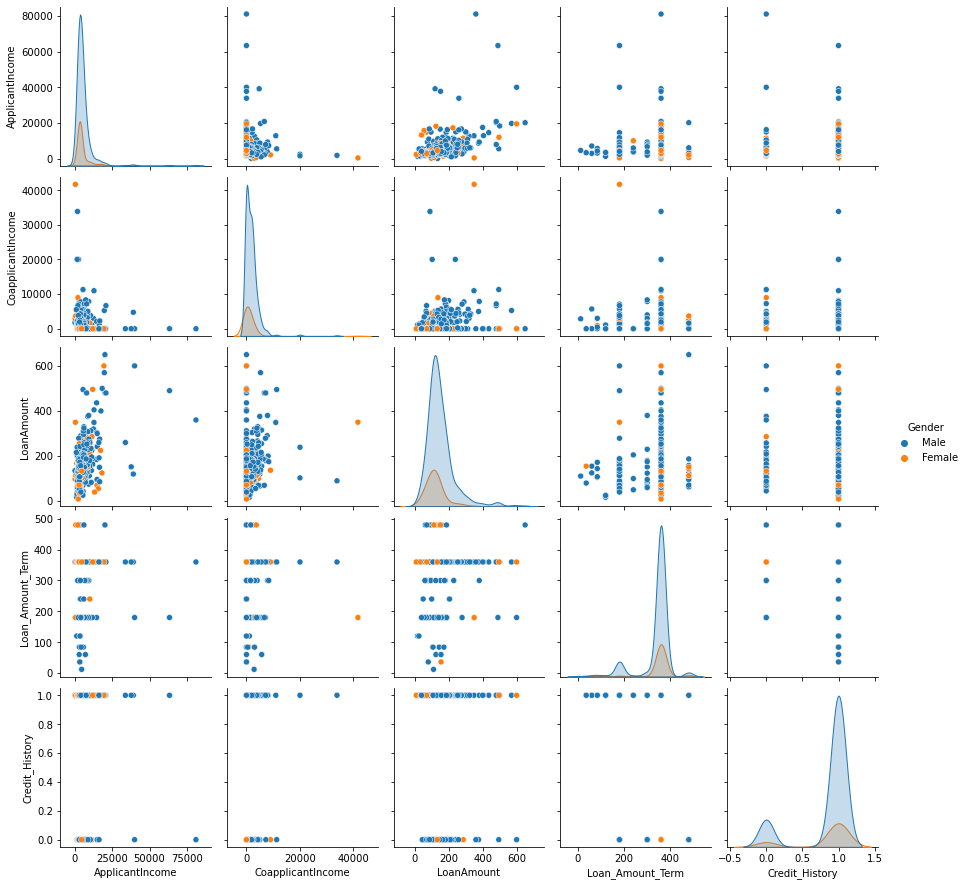

In [27]:
sns.pairplot(train,hue='Gender')

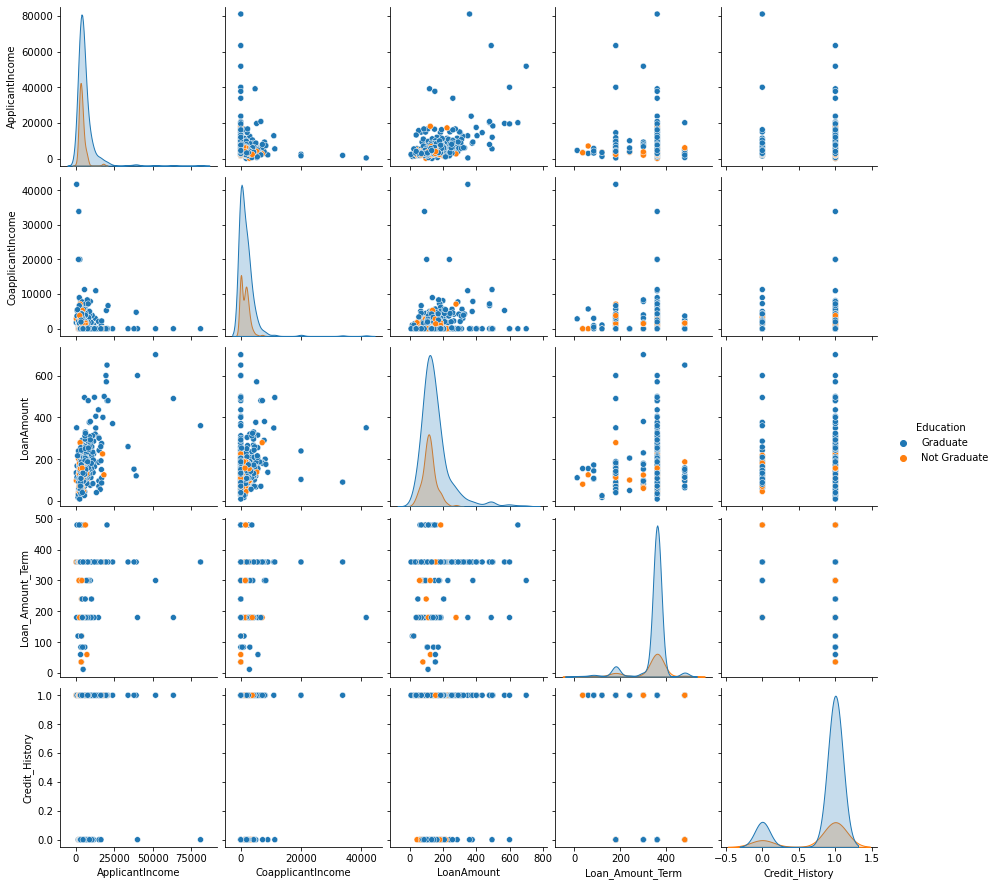

In [28]:
sns.pairplot(train,hue='Education',kind='scatter')

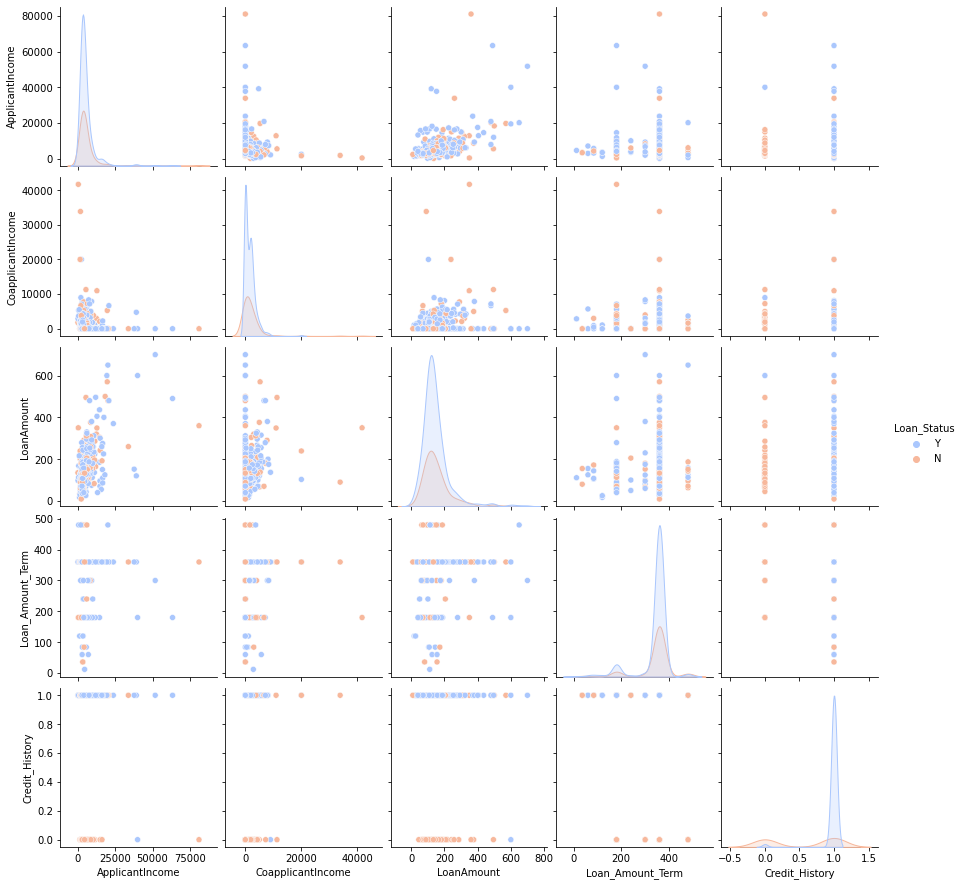

In [29]:
sns.pairplot(train,hue='Loan_Status',palette='coolwarm')

In [30]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [36]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [38]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Model building 

In [41]:
#Droping loan ID

train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [42]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [43]:
#Creating dummies of our data

X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [49]:
# Importing Library
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

In [50]:
from sklearn.model_selection import train_test_split

X_1, X_test, y_1, y_test= train_test_split(X, y, test_size=0.3, random_state=30)
X_train, X_cv, y_train, y_cv= train_test_split(X_1, y_1, test_size=0.3, random_state=30)

In [51]:
#Calculating for finding best C

roc_tr=[]
roc_cv=[]
max_auc_score=0
C_best=0
tuned_parameters= [10**-4, 10**-2, 10**2, 10**4]
for i in tuned_parameters:
    lr= LogisticRegression(C=i, penalty='l1', solver='liblinear')
    lr.fit(X_train, y_train) #fitting are model on Train data
    #Predict the response on the crossvalidation
    pred_cv= lr.predict_proba(X_cv)
    pred_cv=(pred_cv)[:,1]
    roc_cv.append(roc_auc_score(y_cv,pred_cv))
    #Predict the response on the training 
    pred_tr= lr.predict_proba(X_train)
    pred_tr= (pred_tr)[:,1]
    roc_tr.append(roc_auc_score(y_train,pred_tr))
    #Finding the Best c value or max value of auc score
    if roc_auc_score(y_cv,pred_cv) > max_auc_score:
        C_best= i
        max_auc_score= roc_auc_score(y_cv, pred_cv)
        
print("C best value is : ",C_best/100)
print("Max auc score is :", max_auc_score*100)
C_best= C_best/100
C1= C_best
auc1= max_auc_score

C best value is :  1.0
Max auc score is : 67.51662971175166


In [62]:
#Calculating for finding best C

roc_tr=[]
roc_cv=[]
max_auc_score=0
C_best=0
tuned_parameters= [10**-4, 10**-2, 1, 10**2, 10**4]
for i in tuned_parameters:
    lr= LogisticRegression(C=i, penalty='l2', solver='liblinear')
    lr.fit(X_train, y_train) #fitting are model on Train data
    #Predict the response on the crossvalidation
    pred_cv= lr.predict_proba(X_cv)
    pred_cv=(pred_cv)[:,1]
    roc_cv.append(roc_auc_score(y_cv,pred_cv))
    #Predict the response on the training 
    pred_tr= lr.predict_proba(X_train)
    pred_tr= (pred_tr)[:,1]
    roc_tr.append(roc_auc_score(y_train,pred_tr))
    #Finding the Best c value or max value of auc score
    if roc_auc_score(y_cv,pred_cv) > max_auc_score:
        C_best= i
        max_auc_score= roc_auc_score(y_cv, pred_cv)
        
print("C best value is : ",C_best)
print("Max auc score is :", max_auc_score*100)
C_best= C_best
C1= C_best
auc1= max_auc_score

C best value is :  100
Max auc score is : 67.57206208425721


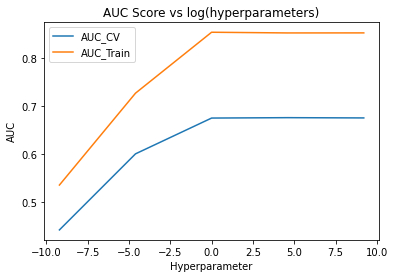

In [63]:
#Ploting curve between K vs Train and Cross validation
plt.plot(np.log(tuned_parameters), roc_cv, label="AUC_CV")
plt.plot(np.log(tuned_parameters), roc_tr, label="AUC_Train")
plt.legend()
plt.title('AUC Score vs log(hyperparameters)')
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.show()

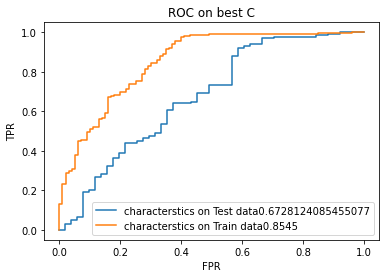

In [64]:
lr= LogisticRegression(C=100, penalty= 'l1',solver='liblinear') # trainning with best K
lr.fit(X_train, y_train)
#Predicting prob on the test data
pred_test= lr.predict_proba(X_test)
pred_test= (pred_test)[:,1]
#Prediction prob on traning data
pred_tr= lr.predict_proba(X_train)
pred_tr= (pred_tr)[:,1]

#plotting ROC curve 
from sklearn import metrics
#finding FPR and TPR on training and test data
fpr, tpr, thershold= metrics.roc_curve(y_test, pred_test)
fpr1, tpr1, thershold1= metrics.roc_curve(y_train, pred_tr)

#plotting
plt.plot(fpr,tpr ,label="characterstics on Test data"+str(roc_auc_score(y_test,pred_test)))
plt.plot(fpr1,tpr1 ,label="characterstics on Train data"+str(roc_auc_score(y_train,pred_tr)))
plt.legend()
plt.title('ROC on best C')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

[[ 17  34]
 [  8 126]]


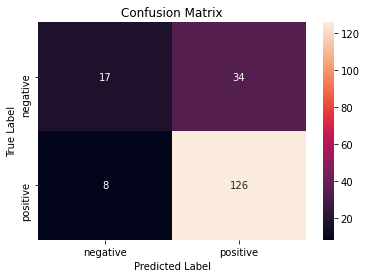

In [65]:
#finding Confusion_matrix
predic=lr.predict(X_test)
conf_mat = confusion_matrix(y_test, predic)
print(conf_mat)

#plotting Confusion Matrix
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [70]:
pred_train = lr.predict(X_test)
accuracy_score(y_test,pred_train)



0.772972972972973

In [72]:
pred_test = lr.predict(test)

In [73]:
submission= pd.read_csv('sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [74]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_Original['Loan_ID']

In [75]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [76]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Mysubmission1.csv', index=False)

# Job Done